In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

from model import DNN


C:\Users\qhddn\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Hyperparameters
input_size = 784
hidden_size = [128, 64]
output_size = 10
num_epochs = 20
learning_rate = 0.001
epsilons = [0, 0.1, 0.15, 0.2]

In [3]:
# Download and load the MNIST data
train_data = datasets.MNIST('mnist_data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_data = datasets.MNIST('mnist_data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)


In [4]:
train_loader_shape = train_loader.dataset.train_data.shape
test_loader_shape = test_loader.dataset.test_data.shape

print(train_loader_shape, test_loader_shape)

torch.Size([10000, 28, 28]) torch.Size([10000, 28, 28])


C:\Users\qhddn\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\qhddn\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [5]:
use_cuda = True  
# Define what device we are using
print("CUDA Available:", torch.cuda.is_available())  

device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")


CUDA Available: False


In [6]:
# Initialize the network
model = DNN(input_size, hidden_size, output_size)
model = model.to(device)

# Train the model
train_acc = model.train(model, device, train_loader, learning_rate, num_epochs)


Start Training ...
Train Epoch 1:: Accuracy: 8798/10000 (88%)
Train Epoch 2:: Accuracy: 9455/10000 (95%)
Train Epoch 3:: Accuracy: 9629/10000 (96%)
Train Epoch 4:: Accuracy: 9710/10000 (97%)
Train Epoch 5:: Accuracy: 9767/10000 (98%)
Train Epoch 6:: Accuracy: 9824/10000 (98%)
Train Epoch 7:: Accuracy: 9832/10000 (98%)
Train Epoch 8:: Accuracy: 9882/10000 (99%)
Train Epoch 9:: Accuracy: 9890/10000 (99%)
Train Epoch 10:: Accuracy: 9895/10000 (99%)
Train Epoch 11:: Accuracy: 9912/10000 (99%)
Train Epoch 12:: Accuracy: 9911/10000 (99%)
Train Epoch 13:: Accuracy: 9916/10000 (99%)
Train Epoch 14:: Accuracy: 9905/10000 (99%)
Train Epoch 15:: Accuracy: 9926/10000 (99%)
Train Epoch 16:: Accuracy: 9928/10000 (99%)
Train Epoch 17:: Accuracy: 9938/10000 (99%)
Train Epoch 18:: Accuracy: 9931/10000 (99%)
Train Epoch 19:: Accuracy: 9958/10000 (100%)
Train Epoch 20:: Accuracy: 9937/10000 (99%)
Finished Training
Saving the model
Saved the model


In [7]:
# Load the trained model
model.load_state_dict(torch.load("../Homework2/model.pth", map_location='cpu'))

# Test the model
test_acc = model.test(model, device, test_loader, num_epochs)


Start Testing ...
Test Epoch 1:: Accuracy: 9949/10000 (99%)
Test Epoch 2:: Accuracy: 9949/10000 (99%)
Test Epoch 3:: Accuracy: 9949/10000 (99%)
Test Epoch 4:: Accuracy: 9949/10000 (99%)
Test Epoch 5:: Accuracy: 9949/10000 (99%)
Test Epoch 6:: Accuracy: 9949/10000 (99%)
Test Epoch 7:: Accuracy: 9949/10000 (99%)
Test Epoch 8:: Accuracy: 9949/10000 (99%)
Test Epoch 9:: Accuracy: 9949/10000 (99%)
Test Epoch 10:: Accuracy: 9949/10000 (99%)
Test Epoch 11:: Accuracy: 9949/10000 (99%)
Test Epoch 12:: Accuracy: 9949/10000 (99%)
Test Epoch 13:: Accuracy: 9949/10000 (99%)
Test Epoch 14:: Accuracy: 9949/10000 (99%)
Test Epoch 15:: Accuracy: 9949/10000 (99%)
Test Epoch 16:: Accuracy: 9949/10000 (99%)
Test Epoch 17:: Accuracy: 9949/10000 (99%)
Test Epoch 18:: Accuracy: 9949/10000 (99%)
Test Epoch 19:: Accuracy: 9949/10000 (99%)
Test Epoch 20:: Accuracy: 9949/10000 (99%)
Finished Testing


In [8]:
# Calculate the average train and test accuracy over 20 epochs
avg_train_accuracy = np.sum(train_acc) / len(train_acc)
print("Average accuracy of Training:", avg_train_accuracy, "%")

avg_test_accuracy = np.sum(test_acc) / len(test_acc)
print("Average accuracy of Testing:", avg_test_accuracy, "%")

Average accuracy of Training: 97.97199999999998 %
Average accuracy of Testing: 99.49 %


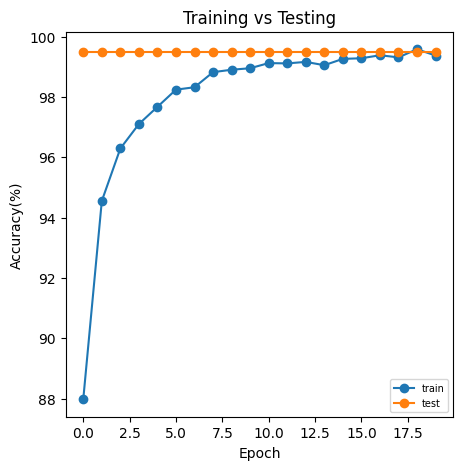

In [9]:
# plot a graph of accuracy training vs testing
plt.figure(figsize=(5, 5))
plt.plot(train_acc, marker='o')
plt.plot(test_acc, marker='o')
plt.title("Training vs Testing")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.legend(['train', 'test'], fontsize=7)
plt.show()


In [10]:
# Run test for each epsilon
adv_acc = []
examples = []
for eps in epsilons:
    acc, ex = model.adv_test(model, device, test_loader, eps)
    adv_acc.append(acc)
    examples.append(ex)


Start Adversarial Examples Testing ...
Epsilon: 0	Accuracy: 9949/10000 (99%)
Finished Adversarial Examples Testing

Start Adversarial Examples Testing ...
Epsilon: 0.1	Accuracy: 3571/10000 (36%)
Finished Adversarial Examples Testing

Start Adversarial Examples Testing ...
Epsilon: 0.15	Accuracy: 1424/10000 (14%)
Finished Adversarial Examples Testing

Start Adversarial Examples Testing ...
Epsilon: 0.2	Accuracy: 681/10000 (7%)
Finished Adversarial Examples Testing



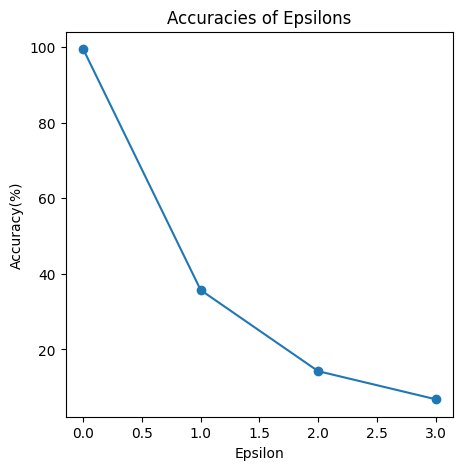

In [11]:
# plot a graph of accuracies vs epsilons
plt.figure(figsize=(5, 5))
plt.plot(adv_acc, marker='o')
plt.title("Accuracies of Epsilons")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy(%)")
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.01it/s]


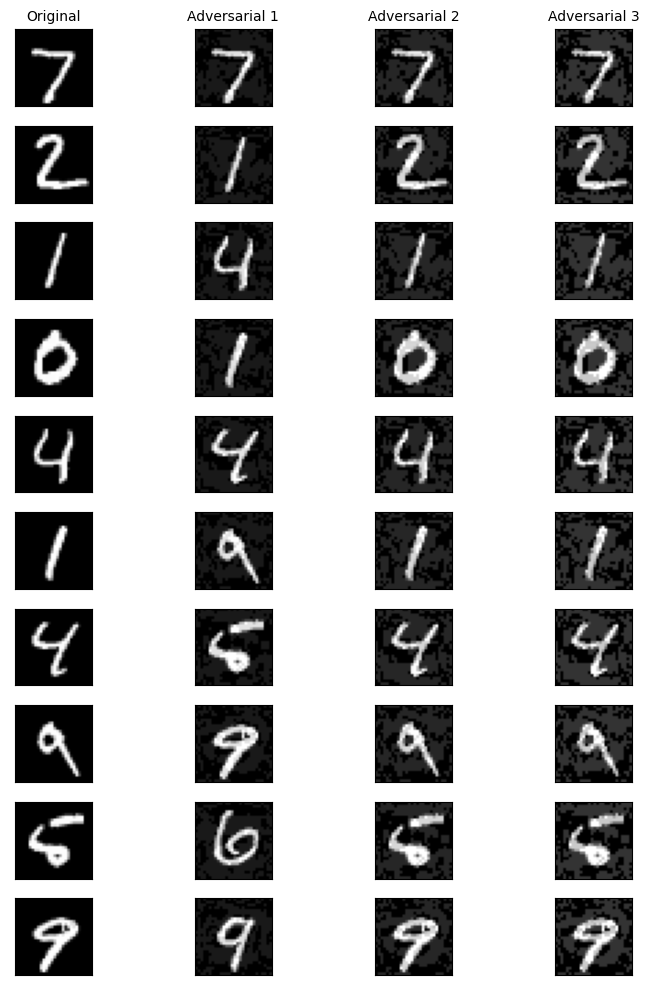

In [12]:
# Plot several examples of original(epsilon=0) and adversarial(epsilon=0.1, 0.15, 0.2) samples
cnt = 0
plt.figure(figsize=(8, 10))

for i in tqdm(range(len(examples[0]))):
    for j in range(len(epsilons)):
        cnt+=1
        plt.subplot(len(examples[j]), len(epsilons), cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if i == 0 and j == 0:
            plt.title("Original", fontsize=10)
        if i == 0 and j > 0:
            plt.title("Adversarial {}".format(j), fontsize=10)
        ex, origin, adv = examples[j][i]
        plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()